In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


Text(0.5, 1.0, 'FMRI signal across time')

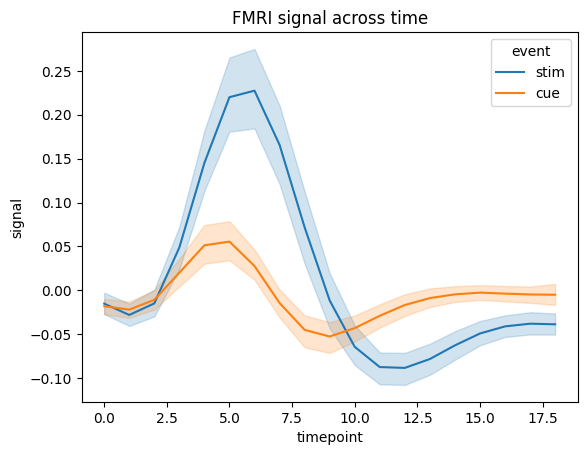

In [48]:
# By default, the plot aggregates over multiple y values 
# at each value of x and shows an estimate of the central tendency 
# and a confidence interval for that estimate.
# errorbar method 
# hue - grouping variable for categorical and numeric coloured lines
sns.lineplot(data=fmri, x='timepoint', y='signal', hue="event")
plt.title("FMRI signal across time")

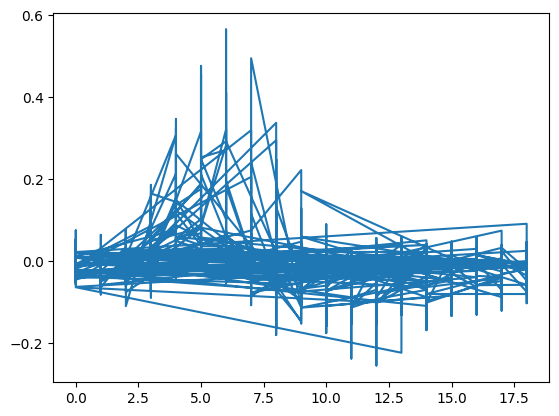

In [49]:
# plot y versus x as lines and/or markers
plt.plot(fmri.timepoint, fmri.signal)

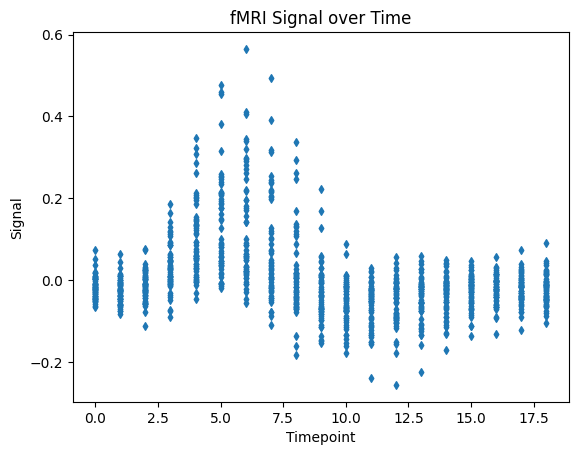

In [50]:
plt.scatter(fmri.timepoint, fmri.signal, marker='d', s=15)
plt.xlabel("Timepoint")
plt.ylabel("Signal")
plt.title("fMRI Signal over Time")
plt.show()

In [51]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

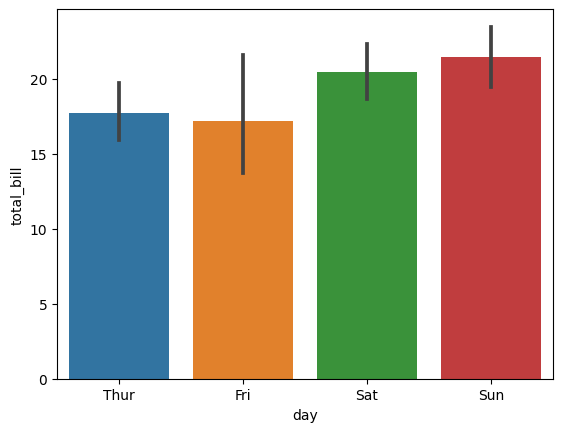

In [52]:
sns.barplot(data=tips, x='day', y="total_bill")

<Axes: xlabel='total_bill', ylabel='day'>

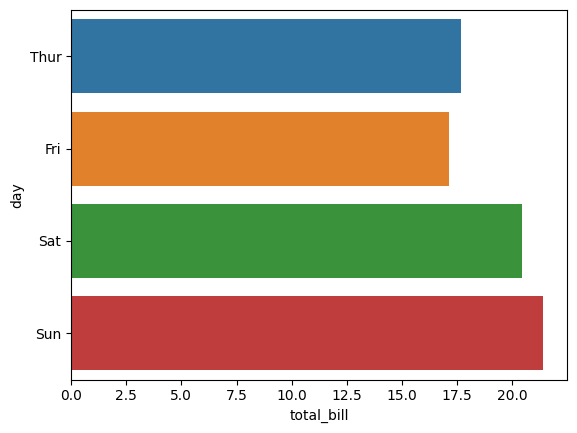

In [53]:
sns.barplot(data=tips, y='day', x="total_bill", errorbar=None)

<Axes: xlabel='day', ylabel='total_bill'>

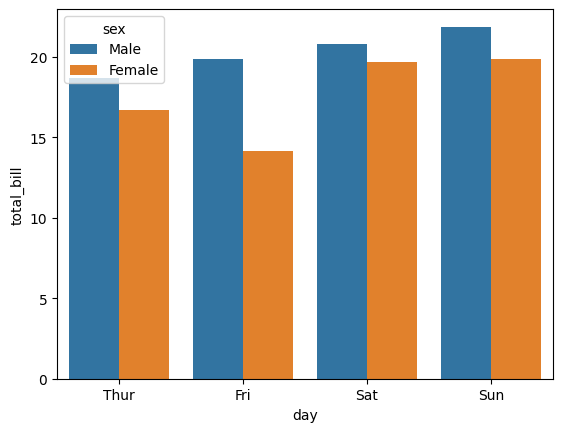

In [54]:
# bar plot, cat plot (categories)
sns.barplot(data=tips, x='day', y="total_bill", hue="sex", errorbar=None)

<BarContainer object of 244 artists>

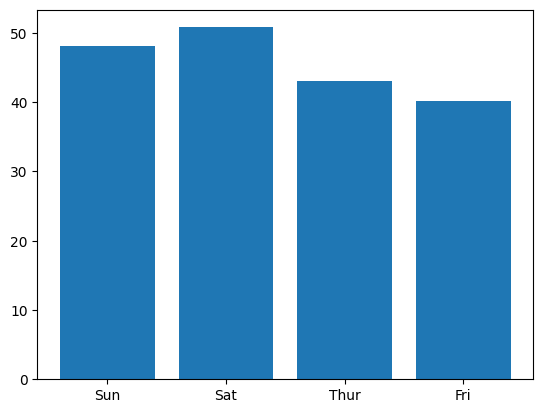

In [55]:
# max counts of each day displayed as its plotting each bar multiple times
# plotted stacked starting at 0
plt.bar(tips.day, tips.total_bill)

<function matplotlib.pyplot.legend(*args, **kwargs)>

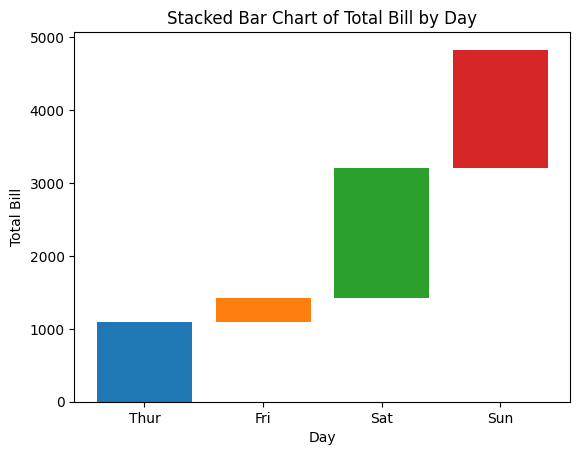

In [56]:
# stacked bar chart

grouped = tips.groupby('day')['total_bill'].sum().reset_index()

days = grouped['day']

total_bills = grouped['total_bill']

bottom = 0

for day, total_bill in zip(days, total_bills):
    plt.bar(day, total_bill, label=day, bottom=bottom)
    bottom += total_bill

plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Stacked Bar Chart of Total Bill by Day')
plt.legend


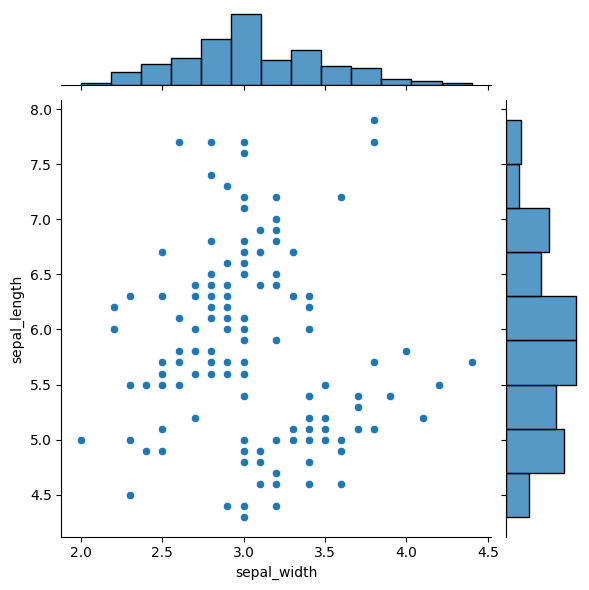

In [57]:
# joint plot 
# seabon.JointGrid
iris = sns.load_dataset("iris")
sns.jointplot(data=iris, x='sepal_width', y='sepal_length')

/home/riggy/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


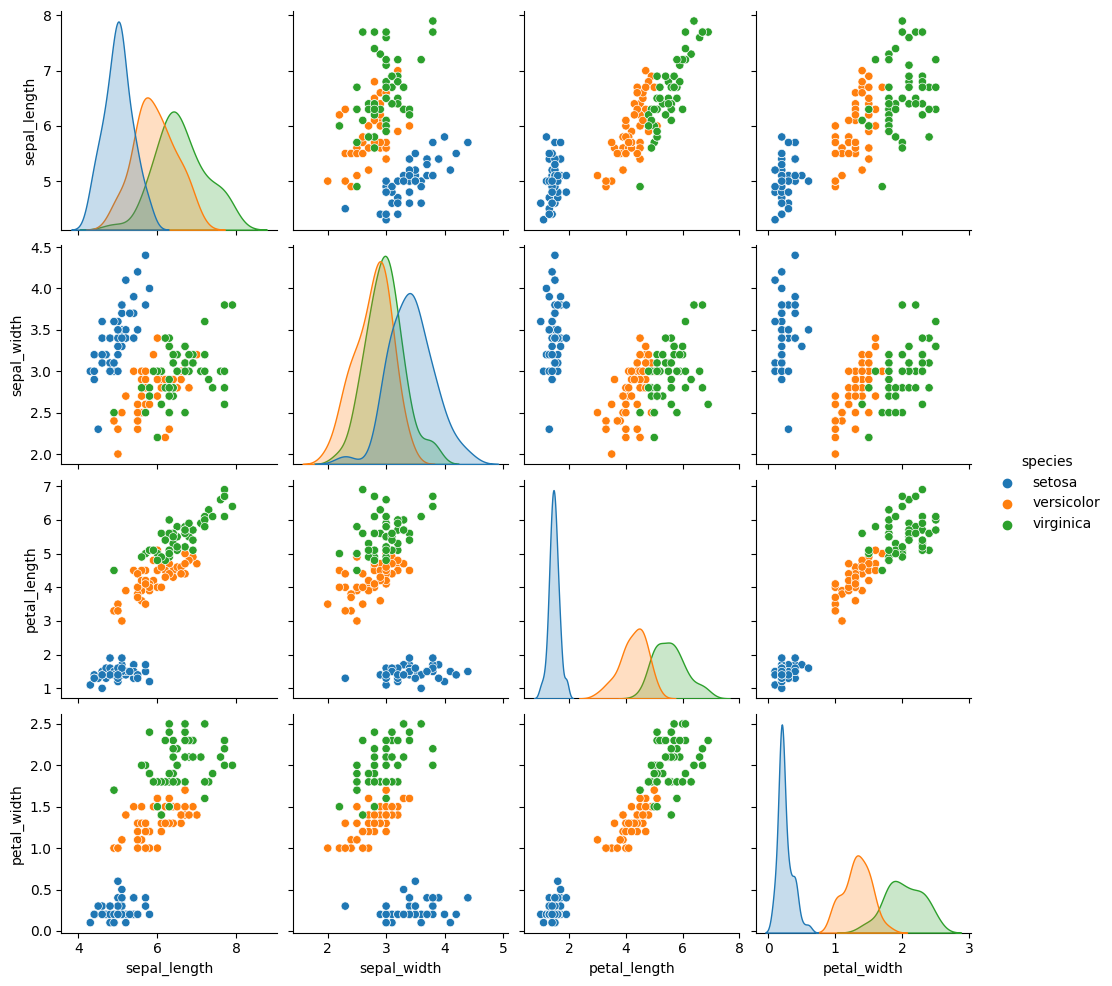

In [58]:
# scatter plot
sns.pairplot(iris, hue='species')

In [59]:
# visualisation
# scatterplot - how two varibales interact
# pairplot - grid of scatterplots and histograms
# for each pair of numerical variables 

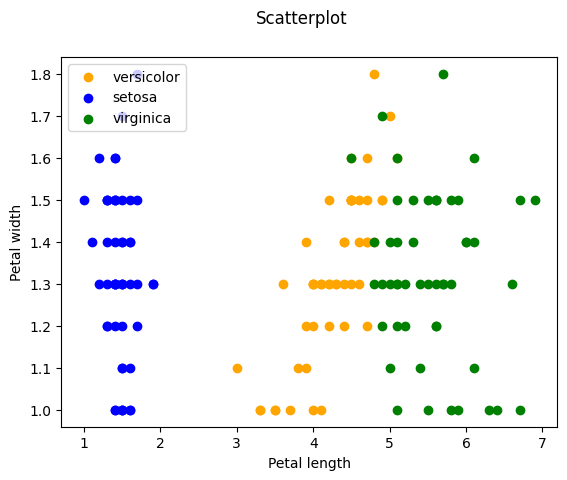

In [60]:
vers = iris[iris['species'] == 'versicolor']
setosa = iris[iris['species'] == 'setosa']
virg = iris[iris['species'] == 'virginica']

plt.scatter(vers.petal_length, vers.petal_width, c='orange')
plt.scatter(setosa.petal_length, vers.petal_width, c='blue')
plt.scatter(virg.petal_length, vers.petal_width, c='green')

plt.suptitle("Scatterplot")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.legend(labels=['versicolor', 'setosa', 'virginica'], loc='upper left')

plt.show()

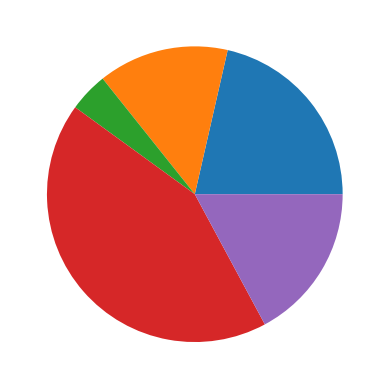

In [61]:
# pie charts, donught charts
size_of_groups=[15, 10,3,30, 12]
plt.pie(size_of_groups)
plt.show()

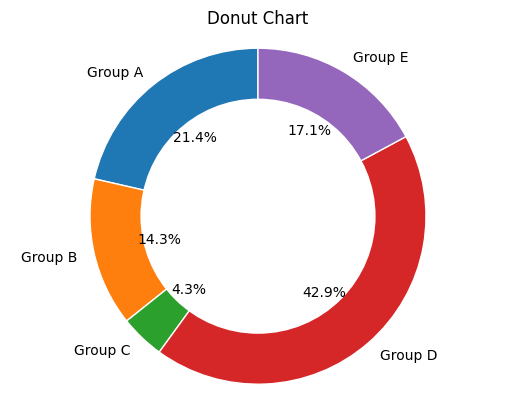

In [62]:
import matplotlib.pyplot as plt

size_of_groups = [15, 10, 3, 30, 12]
labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
plt.pie(size_of_groups, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# equal aspect ratio
plt.axis('equal')
plt.title('Donut Chart')
plt.show()

<Axes: xlabel='month', ylabel='year'>

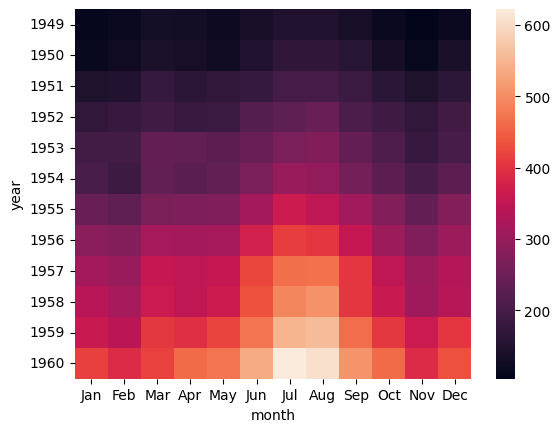

In [63]:
flights = sns.load_dataset('flights')
flights

f_piv = flights.pivot(index='year', columns='month', values='passengers')
f_piv
sns.heatmap(f_piv)